In [1]:
import torch

import d2l.torch as d2l
import numpy as np

In [2]:
SEED = 1234

In [3]:
def init_seed():
    np.random.seed(SEED)
    torch.random.manual_seed(SEED)

In [46]:
class MyModel(d2l.Classifier):
    def __init__(self, n_inputs, n_outputs, lr=0.01, device='cpu'):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, 0.01, size=(n_inputs, n_outputs), requires_grad=True)
        self.B = torch.zeros(n_outputs, requires_grad=True)
        
    def parameters(self):
        return [self.W, self.B]
    
    def _softmax(self, data):
        return torch.nn.functional.softmax(data, dim=1)
        
    def forward(self, X):
        X.to(self.device)
        X_ = X.reshape(X.shape[0], -1)
        y = torch.matmul(X_, self.W) + self.B
        return self._softmax(y)

    def loss(self, y, y_target):
        y = y.to(self.device)
        y_target = y_target.to(self.device)
        y_hat = y[range(y_target.shape[0]), y_target.flatten()]
        return -torch.log(y_hat).mean()

In [47]:
init_seed()

In [48]:
fashion_mnist = d2l.FashionMNIST()
dlr_train = fashion_mnist.get_dataloader(train=True)

In [49]:
# X, y = next(iter(dlr_train))

In [50]:
mdl = MyModel(n_inputs=784, n_outputs=10, device='cuda:0')

In [51]:
# mdl(X_)

In [52]:
trainer = d2l.Trainer(10)

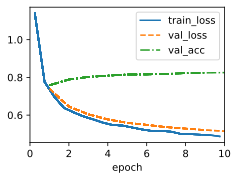

In [53]:
trainer.fit(mdl, fashion_mnist)

# Predict

In [54]:
dlr_val = fashion_mnist.get_dataloader(train=False)

In [59]:
with torch.no_grad():
    X_, y_ = next(iter(dlr_val))
    y_hat = mdl(X_).argmax(dim=1)

In [72]:
mask = y_hat != y_
y_hat_wrong = y_hat[mask]
y_true = y[mask]
X_wrong = X_[mask, :, :, :]

In [73]:
titles = [f"{lab_true}\n{lab_wrong}" for lab_true, lab_wrong in zip(fashion_mnist.text_labels(y_true), fashion_mnist.text_labels(y_hat_wrong))]

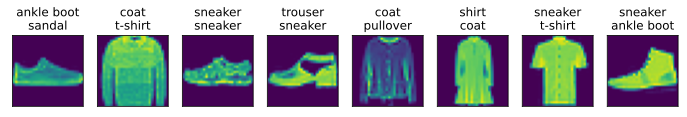

In [74]:
fashion_mnist.visualize((X_wrong[:8],y_true[:8]), labels=titles[:8]) 